In [47]:
import pandas as pd

after = pd.read_csv('balanced_training_data.csv')

after['sub_narrative_labels'] = after['sub_narrative'].str.split(';')
after['narrative_labels'] = after['narrative'].str.split(';')




combined_df = pd.read_csv('training_data.csv')

combined_df['sub_narrative_labels'] = combined_df['sub_narrative'].str.split(';')
combined_df['narrative_labels'] = combined_df['narrative'].str.split(';')

combined_df['text_len'] = combined_df['text'].apply(len)
combined_df['word_count'] = combined_df['text'].str.split().apply(len)
combined_df['avg_word_len'] = combined_df['text'].str.split().apply(lambda x: sum([len(i) for i in x]) / len(x))
combined_df['max_word_len'] = combined_df['text'].str.split().apply(lambda x: max([len(i) for i in x]))
combined_df['min_word_len'] = combined_df['text'].str.split().apply(lambda x: min([len(i) for i in x]))


combined_df

filename                                          narrative  \
0    EN_CC_100013.txt                  CC: Criticism of climate movement   
1    EN_UA_300009.txt                                              Other   
2    EN_UA_300017.txt                                              Other   
3    EN_CC_100021.txt                                              Other   
4    EN_UA_300041.txt                                              Other   
..                ...                                                ...   
794        PT_272.txt  URW: Praise of Russia;URW: Praise of Russia;UR...   
795        PT_323.txt                       CC: Amplifying Climate Fears   
796         PT_74.txt                              URW: Praise of Russia   
797         PT_31.txt  URW: Praise of Russia;URW: Discrediting Ukrain...   
798        PT_238.txt        URW: Praise of Russia;URW: Praise of Russia   

                                         sub_narrative  \
0    CC: Criticism of climate movement: Ad hominem ...   
1                                                Other   
2                                                Other   
3                                                Other   
4                                                Other   
..                                                 ...   
794  URW: Praise of Russia: Praise of Russian milit...   
795                CC: Amplifying Climate Fears: Other   
796  URW: Praise of Russia: Praise of Russian milit...   
797  URW: Praise of Russia: Praise of Russian milit...   
798  URW: Praise of Russia: Russia has internationa...   

                                                  text language  \
0    Bill Gates Says He Is ‘The Solution’ To Climat...       EN   
1    Russia: Clashes erupt in Bashkortostan as righ...       EN   
2    McDonald's to exit Russia, sell business in co...       EN   
3    Collaborative plans, innovation keys to circul...       EN   
4    Russia intends to supply light ‘Mountain’ tank...       EN   
..                                                 ...      ...   
794  Exército da Rússia anuncia conquista da cidade...       PT   
795  Cabo Verde vai ter novo laboratório de Observa...       PT   
796  Rússia assume controlo de mais uma povoação no...       PT   
797  Quais foram as consequências do ataque de Iska...       PT   
798  Ortega celebra com música e dança o 45.º anive...       PT   

                                      narrative_labels  \
0                  [CC: Criticism of climate movement]   
1                                              [Other]   
2                                              [Other]   
3                                              [Other]   
4                                              [Other]   
..                                                 ...   
794  [URW: Praise of Russia, URW: Praise of Russia,...   
795                     [CC: Amplifying Climate Fears]   
796                            [URW: Praise of Russia]   
797  [URW: Praise of Russia, URW: Discrediting Ukra...   
798     [URW: Praise of Russia, URW: Praise of Russia]   

                                  sub_narrative_labels  \
0    [CC: Criticism of climate movement: Ad hominem...   
1                                              [Other]   
2                                              [Other]   
3                                              [Other]   
4                                              [Other]   
..                                                 ...   
794  [URW: Praise of Russia: Praise of Russian mili...   
795              [CC: Amplifying Climate Fears: Other]   
796  [URW: Praise of Russia: Praise of Russian mili...   
797  [URW: Praise of Russia: Praise of Russian mili...   
798  [URW: Praise of Russia: Russia has internation...   

                                               cleaned  text_len  word_count  \
0    bill gates say solution climate change ok priv...      2021         345   
1    russia clash erupt bashkortostan right 

0      [CC: Criticism of climate movement: Ad hominem...
1                                                [Other]
2                                                [Other]
3                                                [Other]
4                                                [Other]
                             ...                        
794    [URW: Praise of Russia: Praise of Russian mili...
795                [CC: Amplifying Climate Fears: Other]
796    [URW: Praise of Russia: Praise of Russian mili...
797    [URW: Praise of Russia: Praise of Russian mili...
798    [URW: Praise of Russia: Russia has internation...
Name: sub_narrative_labels, Length: 799, dtype: object

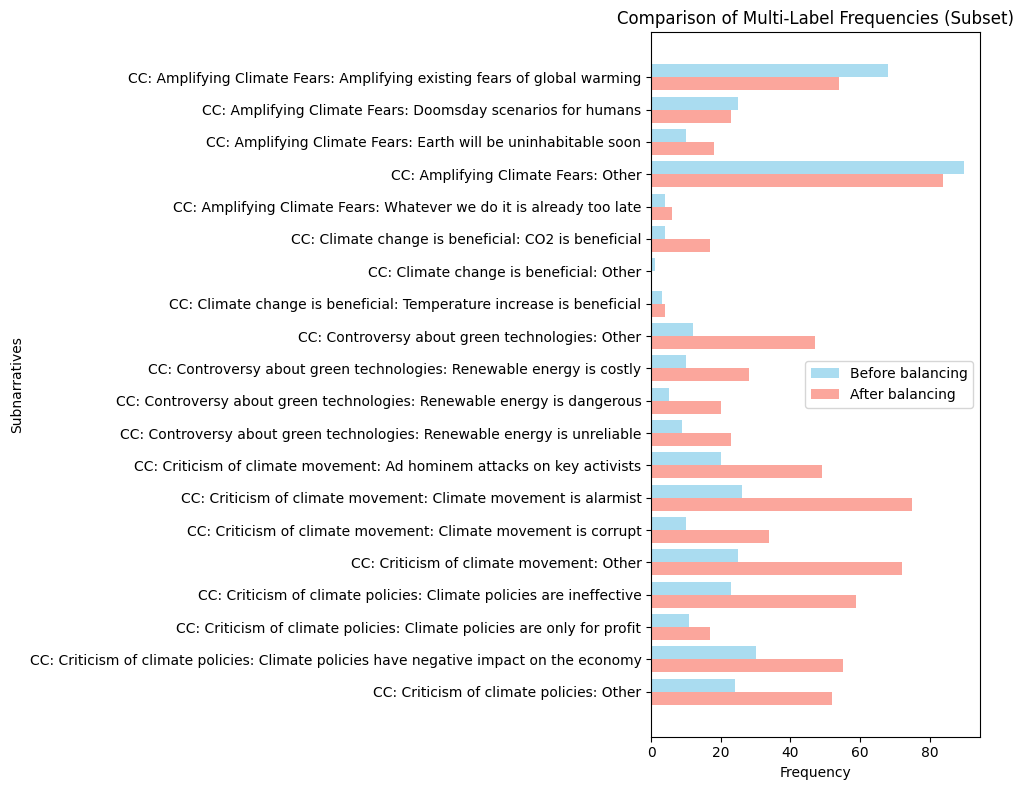

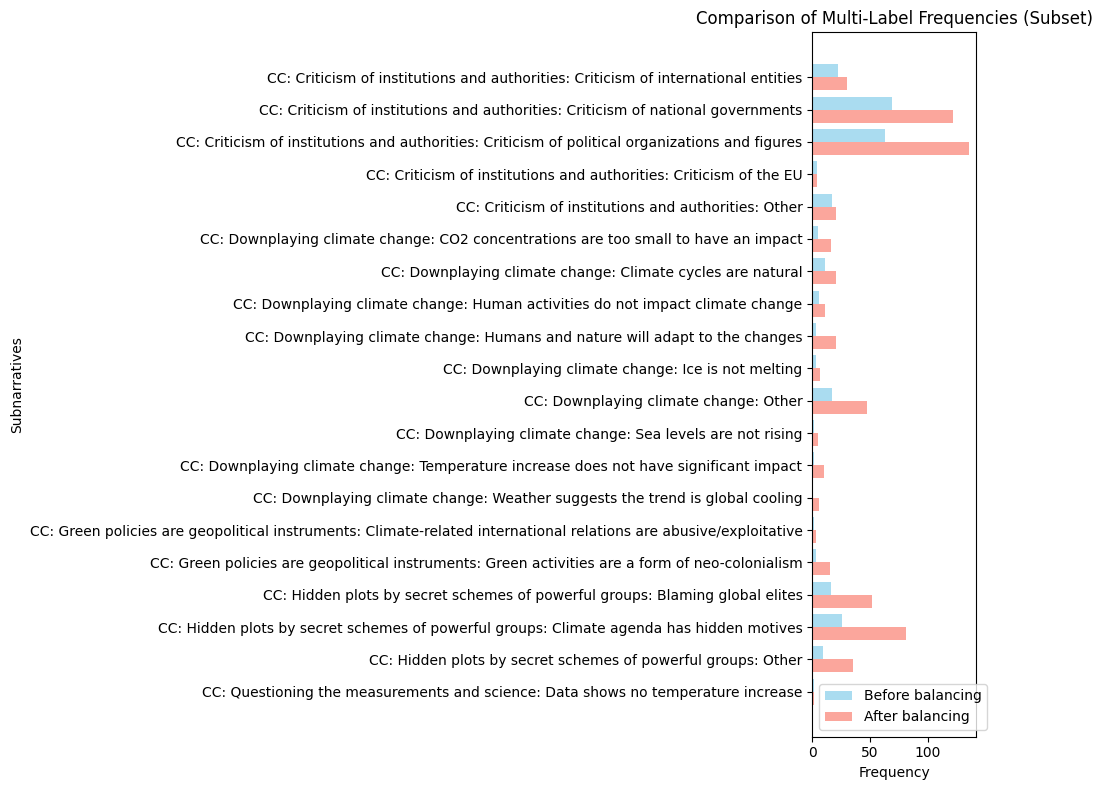

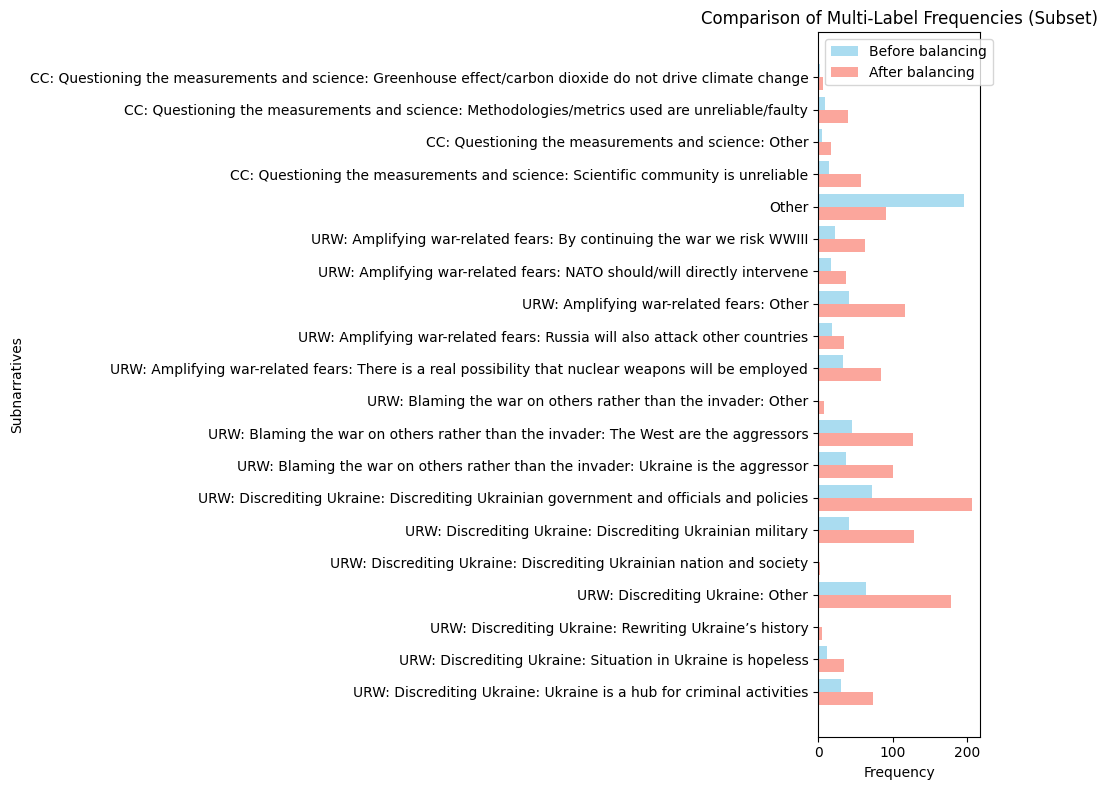

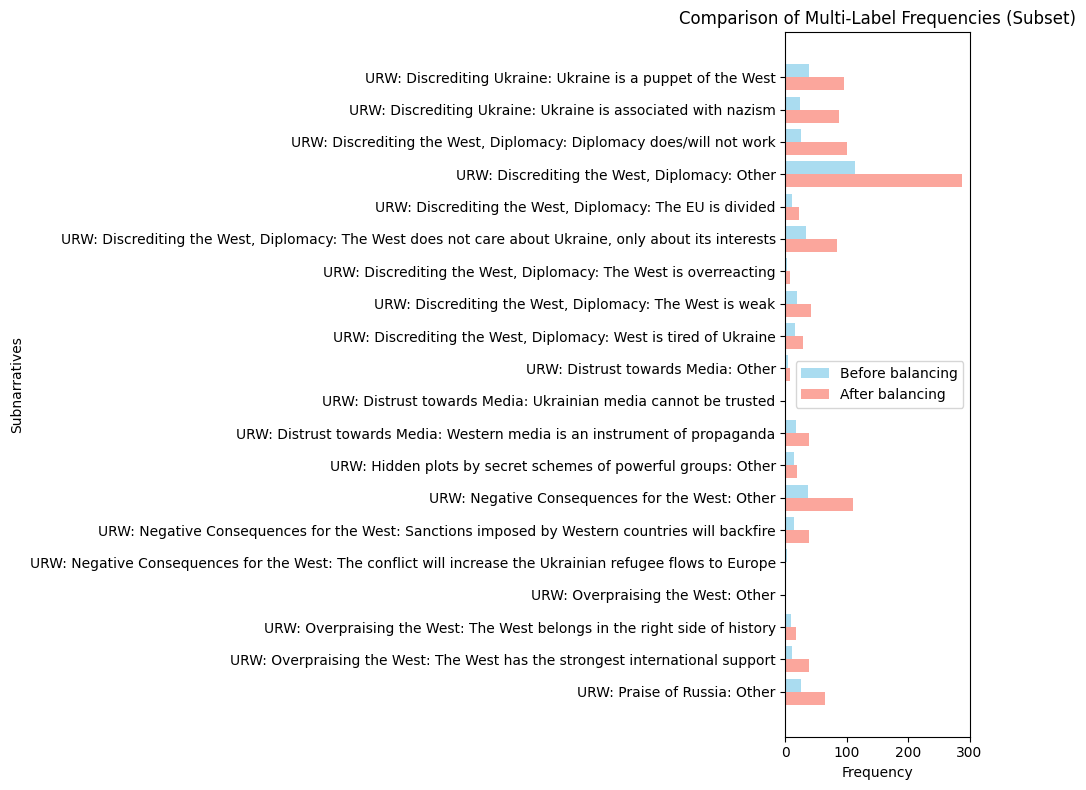

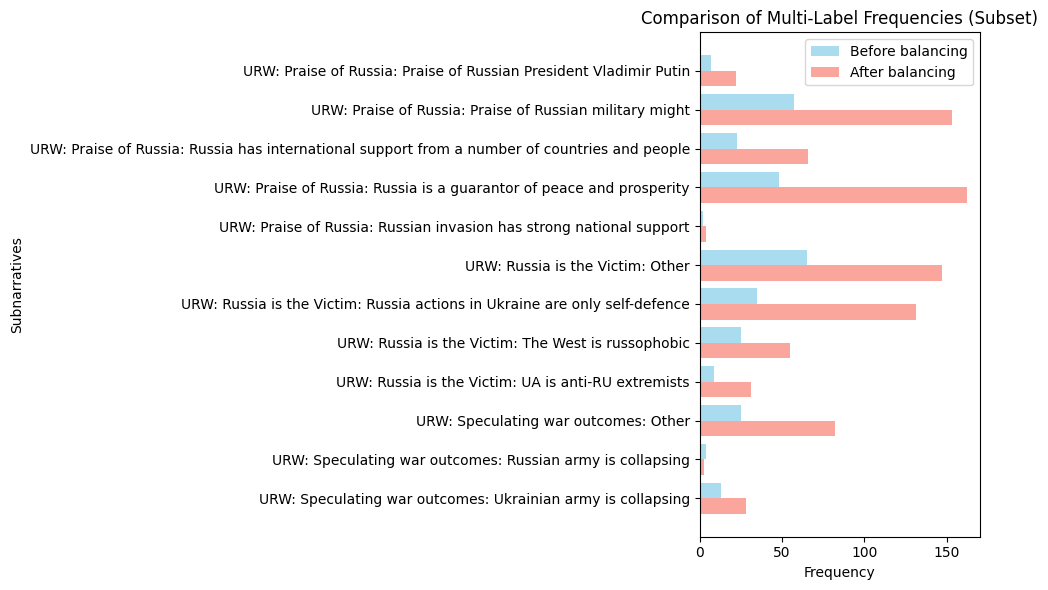

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# --------------------------------------------------------------------------
# Count label frequencies before oversampling
# --------------------------------------------------------------------------
counter_before = Counter()
for label_list in combined_df['sub_narrative_labels']:
    for lbl in label_list:
        counter_before[lbl] += 1

# --------------------------------------------------------------------------
# Count label frequencies after oversampling
# --------------------------------------------------------------------------
counter_after = Counter()
for label_list in after['sub_narrative_labels']:
    for lbl in label_list:
        counter_after[lbl] += 1


# --------------------------------------------------------------------------
# 2. Merge all labels into one sorted list
# --------------------------------------------------------------------------
all_labels = sorted(set(counter_before.keys()) | set(counter_after.keys()))
counts_before = [counter_before[label] for label in all_labels]
counts_after = [counter_after[label] for label in all_labels]

# --------------------------------------------------------------------------
# 3. Chunk the labels for multiple subplots
# --------------------------------------------------------------------------
chunk_size = 20
chunks = [all_labels[i:i + chunk_size] for i in range(0, len(all_labels), chunk_size)]

def plot_chunk(labels_subset):
    # Indices for each label in this chunk
    indices = np.arange(len(labels_subset))

    # Extract sub-arrays of counts
    cb = [counter_before[l] for l in labels_subset]
    ca = [counter_after[l] for l in labels_subset]

    bar_height = 0.4
    plt.figure(figsize=(10, max(6, len(labels_subset)*0.4)))  # adjust size as needed

    # Plot bars for "Before Oversampling"
    plt.barh(indices, cb, height=bar_height, color='skyblue', alpha=0.7, label="Before balancing")

    # Plot bars for "After Oversampling" (shift upward by bar_height)
    plt.barh(indices + bar_height, ca, height=bar_height, color='salmon', alpha=0.7, label="After balancing")

    # Set y-ticks in the middle between two bars
    plt.yticks(indices + bar_height / 2, labels_subset)

    plt.gca().invert_yaxis()  # largest bar on top

    plt.xlabel("Frequency")
    plt.ylabel("Subnarratives")
    plt.title("Comparison of Multi-Label Frequencies (Subset)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------------------------
# 4. Generate a separate plot for each chunk
# --------------------------------------------------------------------------
for subset in chunks:
    plot_chunk(subset)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for 92 classes (replace with your own)
num_classes = 92
labels = [f"Sn.{i+1}" for i in range(num_classes)]

# Replace these with your actual label counts before and after oversampling
counts_before = np.random.randint(10, 100, size=num_classes)
counts_after = np.random.randint(10, 200, size=num_classes)

# Create y positions so that two bars per class can be placed side by side
y_positions = np.arange(num_classes) * 2.0  # spacing factor for clarity
bar_height = 0.8  # thickness of each bar

plt.figure(figsize=(12, 24))  # (width, height) in inches; adjust as needed

# Plot "Before Oversampling" bars
plt.barh(
    y_positions,
    counts_before,
    height=bar_height,
    color='C0',
    alpha=0.7,
    label="Before Oversampling"
)

# Plot "After Oversampling" bars
plt.barh(
    y_positions + bar_height,
    counts_after,
    height=bar_height,
    color='C1',
    alpha=0.7,
    label="After Oversampling"
)

# Configure the y-axis to display class labels centered between the two bars
plt.yticks(y_positions + bar_height / 2.0, labels)

plt.xlabel("Number of Instances")
plt.ylabel("Classes")
plt.title("Multi-Label Distribution Before and After Oversampling for 92 Classes")
plt.legend()
plt.tight_layout()
plt.show()


mean    433.627034
max     924.000000
min      88.000000
Name: word_count, dtype: float64


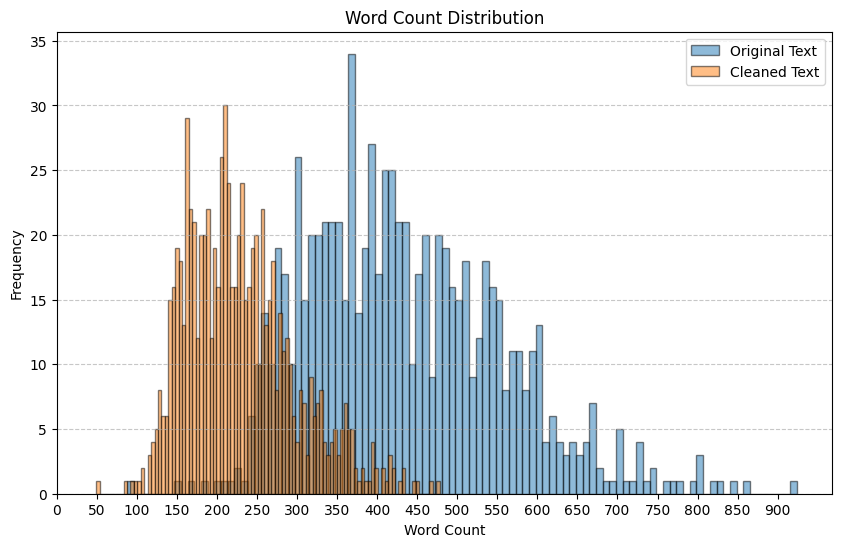

In [41]:
import matplotlib.pyplot as plt
combined_df['sub_narrative_labels'] = combined_df['sub_narrative'].str.split(';')
combined_df['narrative_labels'] = combined_df['narrative'].str.split(';')

combined_df['text_len'] = combined_df['text'].apply(len)
combined_df['word_count'] = combined_df['text'].str.split().apply(len)
combined_df['avg_word_len'] = combined_df['text'].str.split().apply(lambda x: sum([len(i) for i in x]) / len(x))
combined_df['max_word_len'] = combined_df['text'].str.split().apply(lambda x: max([len(i) for i in x]))
combined_df['min_word_len'] = combined_df['text'].str.split().apply(lambda x: min([len(i) for i in x]))

print(combined_df['word_count'].agg(['mean', 'max', 'min']))


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot original text word count distribution
plt.hist(combined_df['text'].str.split().apply(len), bins=100, alpha=0.5, edgecolor='black', label='Original Text')

# Plot cleaned text word count distribution
plt.hist(combined_df['cleaned'].str.split().apply(len), bins=100, alpha=0.5, edgecolor='black', label='Cleaned Text')

plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-ticks
xticks = range(0, combined_df['word_count'].max() + 1, 50)
plt.xticks(xticks)

# Add legend
plt.legend()

plt.show()

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
import networkx as nx
import pandas as pd
import seaborn as sns
from collections import Counter
import squarify
import textwrap



def calculate_plot(df, text_column='text', label_column_name='narrative_labels'):
    combined_df = df.copy()
    combined_df['sub_narrative_labels'] = combined_df['sub_narrative'].str.split(';')
    combined_df['narrative_labels'] = combined_df['narrative'].str.split(';')
    
    combined_df['text_len'] = combined_df[text_column].apply(len)
    combined_df['word_count'] = combined_df[text_column].str.split().apply(len)
    combined_df['avg_word_len'] = combined_df[text_column].str.split().apply(lambda x: sum([len(i) for i in x]) / len(x))
    combined_df['max_word_len'] = combined_df[text_column].str.split().apply(lambda x: max([len(i) for i in x]))
    combined_df['min_word_len'] = combined_df[text_column].str.split().apply(lambda x: min([len(i) for i in x]))
    
    combined_df['word_count'].agg(['mean', 'max', 'min'])
    

    plt.figure(figsize=(10, 6))
    combined_df['word_count'].plot(kind='hist', bins=100, alpha=0.7, edgecolor='black')
    plt.title('Word Count Distribution')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    xticks = range(0, combined_df['word_count'].max() + 1, 50)
    plt.xticks(xticks)
    plt.show()
    
    # Explode the list of labels so each label is in its own row
    exploded = combined_df.explode(label_column_name)

    # Compute frequency counts for each label
    label_counts = exploded[label_column_name].value_counts()
    print("Label Frequencies:\n", label_counts)

    plt.figure(figsize=(10, 6))  # Adjust figure height for readability
    sns.barplot(x=label_counts.values, y=label_counts.index, palette='viridis')
    plt.title('Label Frequency for N Classes')
    plt.xlabel('Count')
    plt.ylabel('Labels')
    plt.tight_layout()
    plt.show()

    
    top_n = 20
    top_labels = label_counts.head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_labels.values, y=top_labels.index, palette='rocket')
    plt.title(f'Top {top_n} Most Frequent Classes')
    plt.xlabel('Count')
    plt.ylabel('Labels')
    plt.tight_layout()
    plt.show()

    # Get the unique labels
    unique_labels = exploded[label_column_name].unique()

    # Initialize an empty co-occurrence DataFrame
    co_occurrence = pd.DataFrame(0, index=unique_labels, columns=unique_labels)

    # Update counts for each sample's label pairs
    for labels in combined_df[label_column_name]:
        for label in labels:
            co_occurrence.loc[label, label] += 1
        for l1, l2 in combinations(labels, 2):
            co_occurrence.loc[l1, l2] += 1
            co_occurrence.loc[l2, l1] += 1

    # Focus on the top 20 most frequent labels
    top_n = 20
    top_labels = label_counts.head(top_n).index
    subset_co_occurrence = co_occurrence.loc[top_labels, top_labels]

#     # Create a clustermap to see natural groupings
#     sns.clustermap(subset_co_occurrence, annot=True, cmap='viridis', figsize=(20, 16))
#     plt.title('Co-occurrence Clustermap for Top 20 Classes', pad=100)
#     plt.show()
    

    # Create a graph
    G = nx.Graph()

    # Add nodes with a frequency attribute
    for label in unique_labels:
        G.add_node(label, frequency=label_counts[label])

    # Define a threshold to limit edges (adjust as needed)
    threshold = 10

    # Add edges for pairs that co-occur above the threshold
    for i, label1 in enumerate(unique_labels):
        for label2 in unique_labels[i+1:]:
            weight = co_occurrence.loc[label1, label2]
            if weight >= threshold:
                G.add_edge(label1, label2, weight=weight)

    # Draw the network graph
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=10)
    node_sizes = [G.nodes[node]['frequency']*0.7 for node in G.nodes()]
    edge_widths = [G[u][v]['weight']*0.004 for u, v in G.edges()]

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=12)
    plt.title("Network Graph of Label Co-occurrence (Threshold = {})".format(threshold))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Convert each list of labels into a frozenset (to ensure hashability)
    combo_counts = Counter([frozenset(x) for x in combined_df[label_column_name]])

    # Create a DataFrame for the top 10 combinations
    top_combos = combo_counts.most_common(10)
    combo_df = pd.DataFrame({
        'Label Combination': [", ".join(sorted(list(combo))) for combo, count in top_combos],
        'Count': [count for combo, count in top_combos]
    })

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y='Label Combination', data=combo_df, palette="mako")
    plt.title("Top 10 Unique Label Combinations")
    plt.xlabel("Frequency")
    plt.ylabel("Label Combination")
    plt.tight_layout()
    plt.show()

    # Let's show the top 30 classes for clarity
    top_n = 30
    
    label_counts = exploded['narrative_labels'].value_counts()

    # Sort counts descending
    label_counts_sorted = label_counts.sort_values(ascending=False)
    treemap_data = label_counts_sorted.head(top_n)

    # Calculate percentages
    total = treemap_data.sum()
    percentages = (treemap_data / total) * 100

    # Function to format labels (wrap text + percentage + small rectangles as "...")
    def format_labels(labels, values, percentages, min_size=0.1, width=16):
        max_value = max(values)  # Reference largest rectangle
        formatted_labels = []

        for label, value, percent in zip(labels, values, percentages):
            if value < max_value * min_size:  # If too small, replace with "..."
                formatted_labels.append("...")
            else:
                wrapped_label = '\n'.join(textwrap.wrap(label, width=width))
                formatted_labels.append(f"{wrapped_label}\n{percent:.1f}%")  # Add percentage

        return formatted_labels

    # Format labels
    formatted_labels = format_labels(treemap_data.index, treemap_data.values, percentages)

    # Apply a colormap (e.g., 'viridis', 'coolwarm', 'magma', 'plasma', etc.)
    colors = plt.cm.plasma(np.linspace(1, 0, len(treemap_data)))

    plt.figure(figsize=(8, 6))
    squarify.plot(sizes=treemap_data.values,
                  label=formatted_labels,  # Use formatted labels
                  color=colors,  # Apply colormap
                  alpha=0.7,
                  text_kwargs={'fontsize': 8})

    plt.title('Treemap of Class Frequencies with Percentages & Colormap')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Let's show the top 20 classes for clarity
    top_n = 12
    pie_data = label_counts_sorted.head(top_n)
    other_count = label_counts_sorted[top_n:].sum()  # Sum the remaining classes as "Other"

    # Add "Other" category if there are more than top_n classes
    if other_count > 0:
        pie_data = pd.concat([pie_data, pd.Series({f'Other {label_counts_sorted.shape[0]-top_n} classes': other_count})])

    # Colors for the pie chart
    colors = plt.cm.magma(np.linspace(1, 0, len(pie_data)))

    # Create pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

    plt.title(f'Pie Chart of Class (Top {top_n} Classes + Other small classes)')
    plt.tight_layout()
    plt.show()



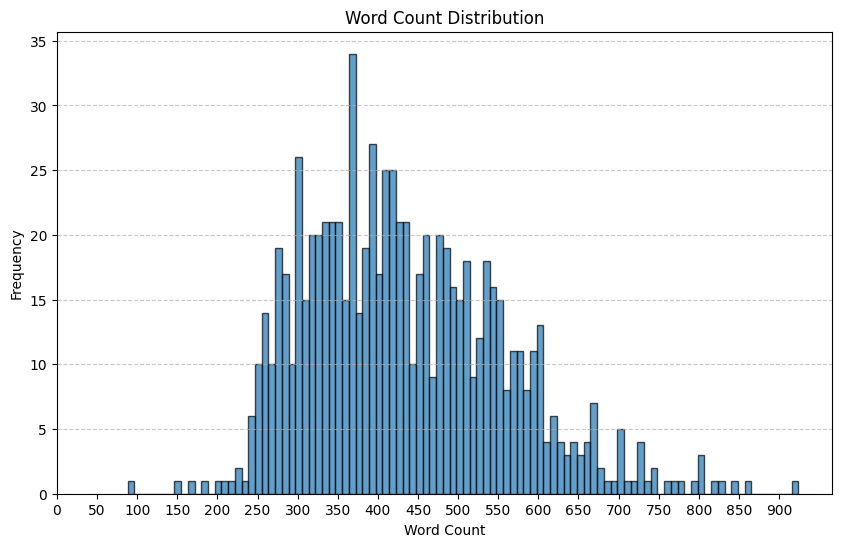

Label Frequencies:
 narrative_labels
URW: Discrediting Ukraine                                 285
URW: Discrediting the West, Diplomacy                     221
CC: Amplifying Climate Fears                              197
Other                                                     196
CC: Criticism of institutions and authorities             175
URW: Praise of Russia                                     162
URW: Russia is the Victim                                 134
URW: Amplifying war-related fears                         134
CC: Criticism of climate policies                          88
URW: Blaming the war on others rather than the invader     83
CC: Criticism of climate movement                          81
URW: Negative Consequences for the West                    53
CC: Hidden plots by secret schemes of powerful groups      51
CC: Downplaying climate change                             50
URW: Speculating war outcomes                              42
CC: Controversy about green techn

C:\Users\yelzha\AppData\Local\Temp\ipykernel_21348\2529593001.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.values, y=label_counts.index, palette='viridis')


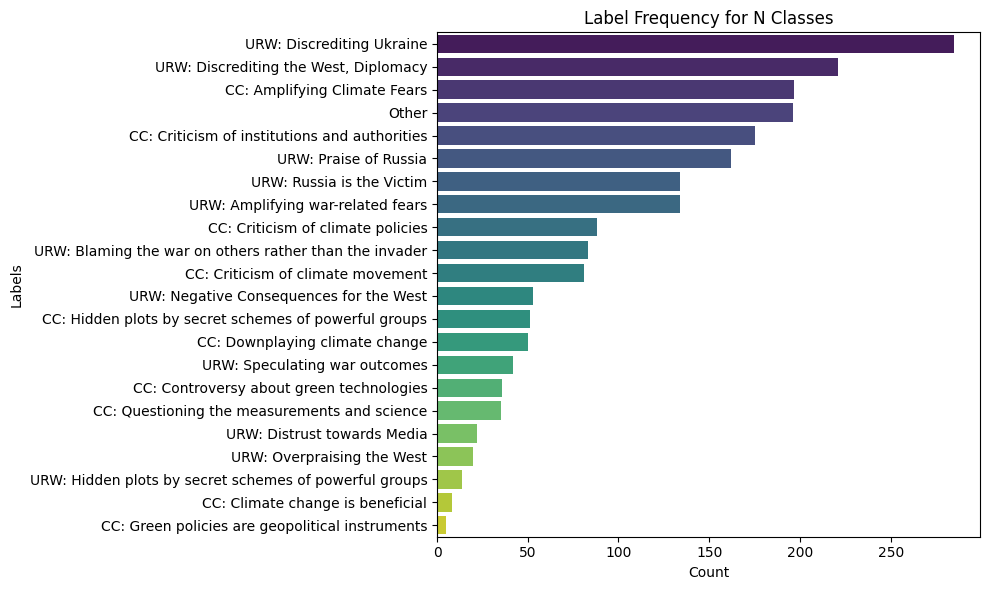

C:\Users\yelzha\AppData\Local\Temp\ipykernel_21348\2529593001.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_labels.values, y=top_labels.index, palette='rocket')


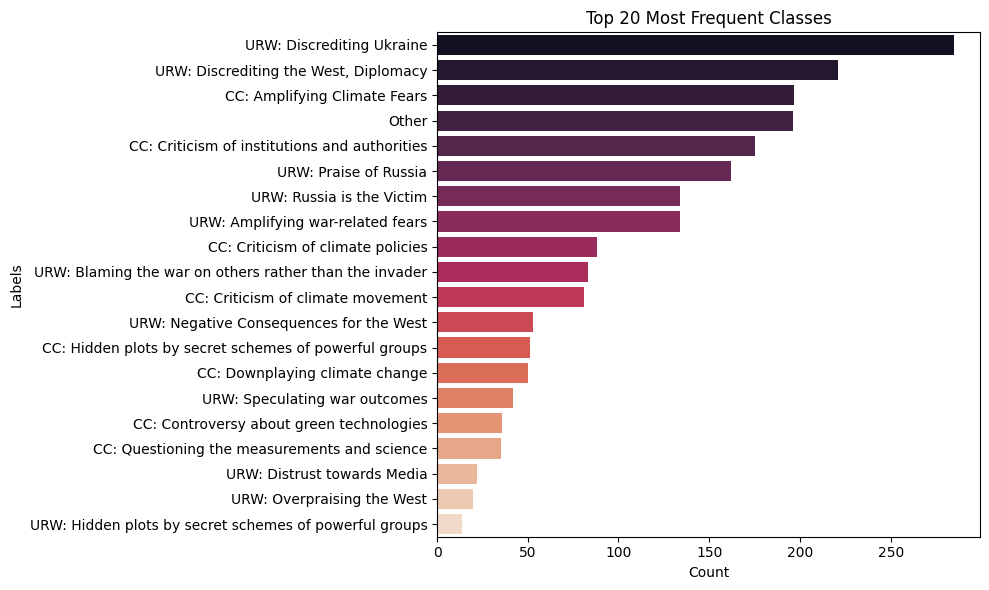

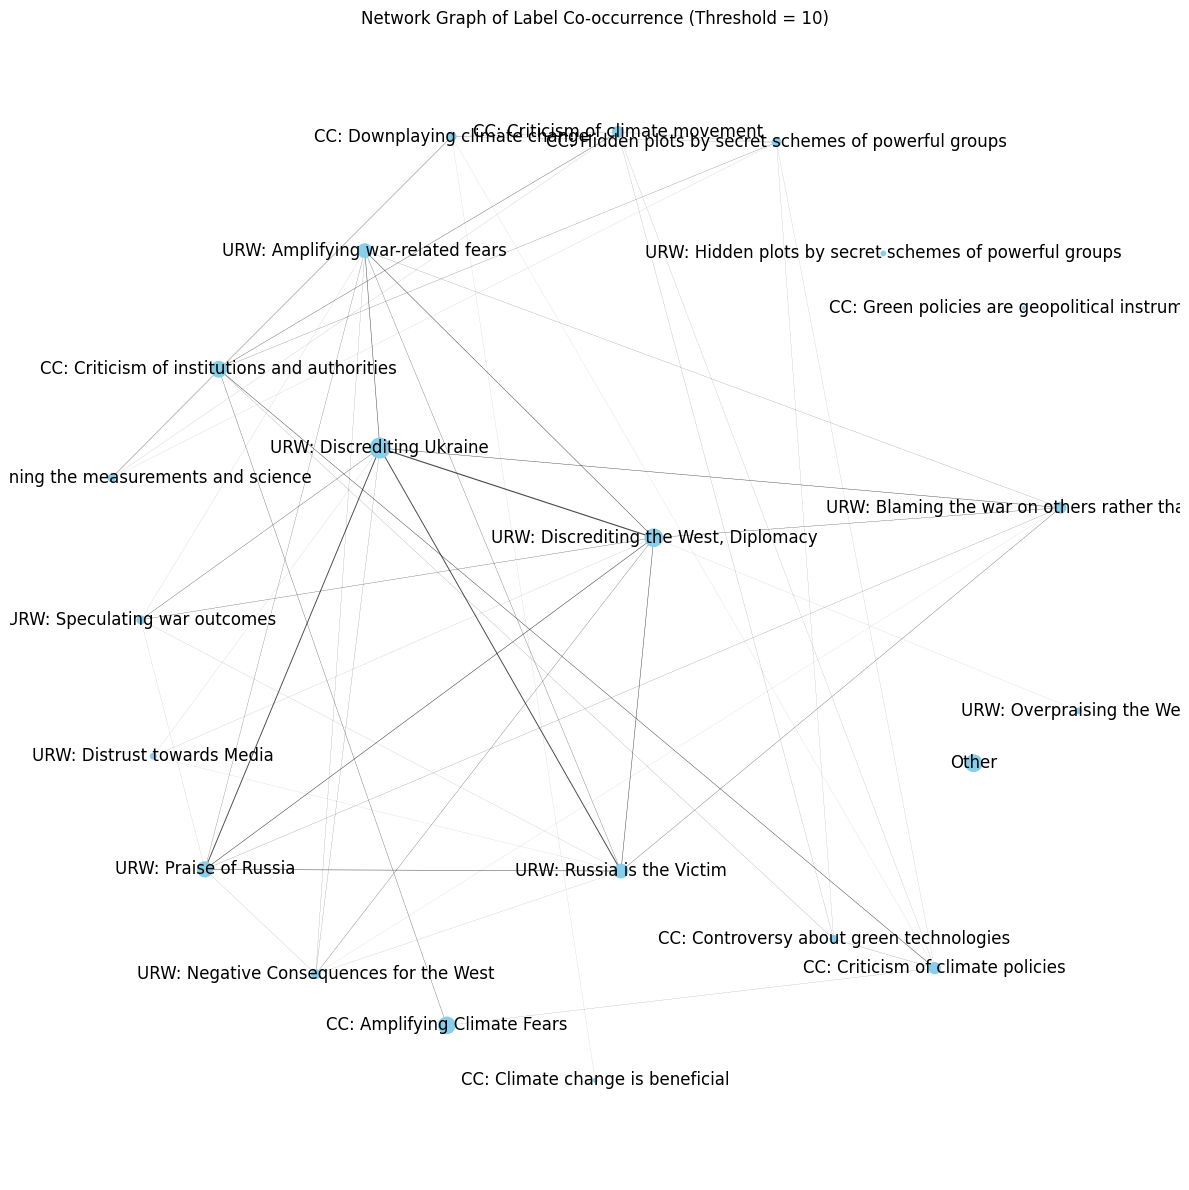

C:\Users\yelzha\AppData\Local\Temp\ipykernel_21348\2529593001.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Label Combination', data=combo_df, palette="mako")


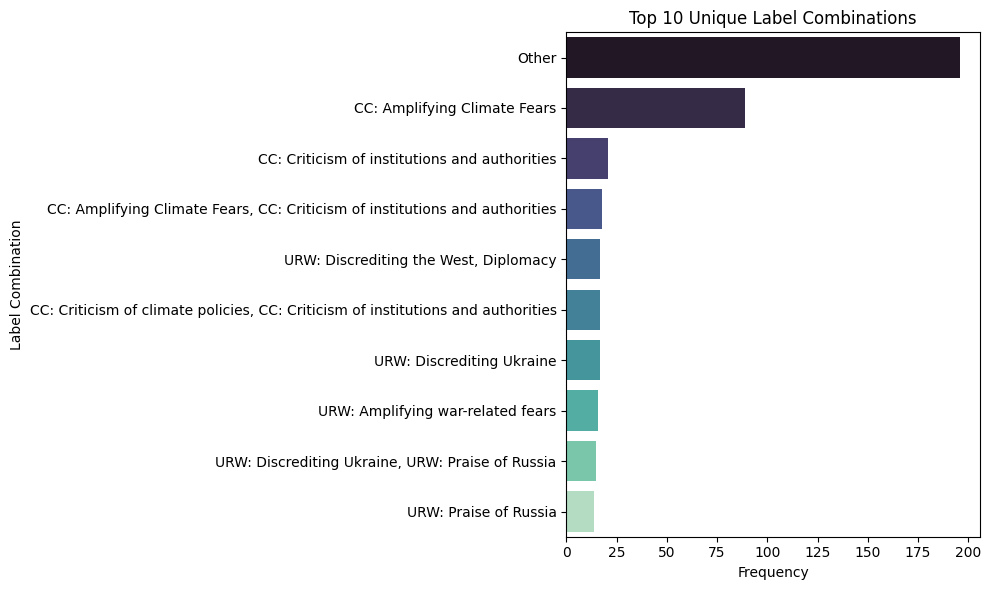

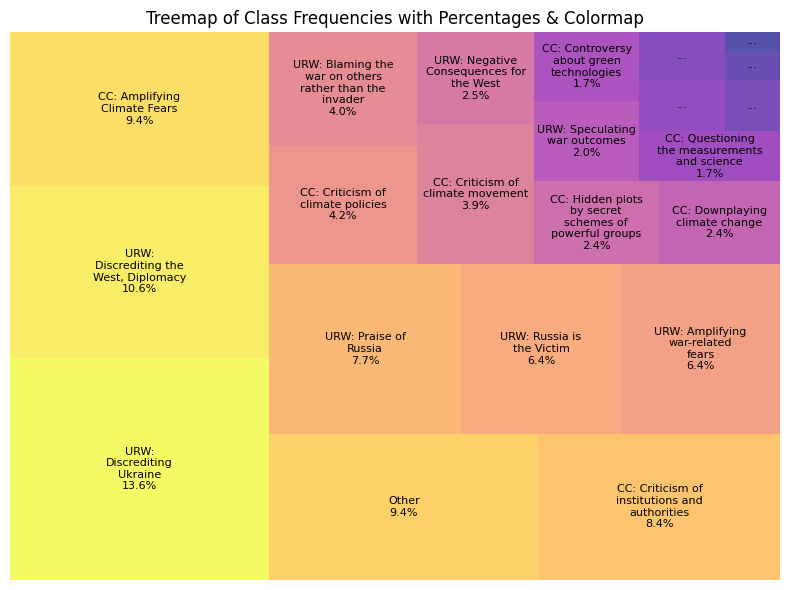

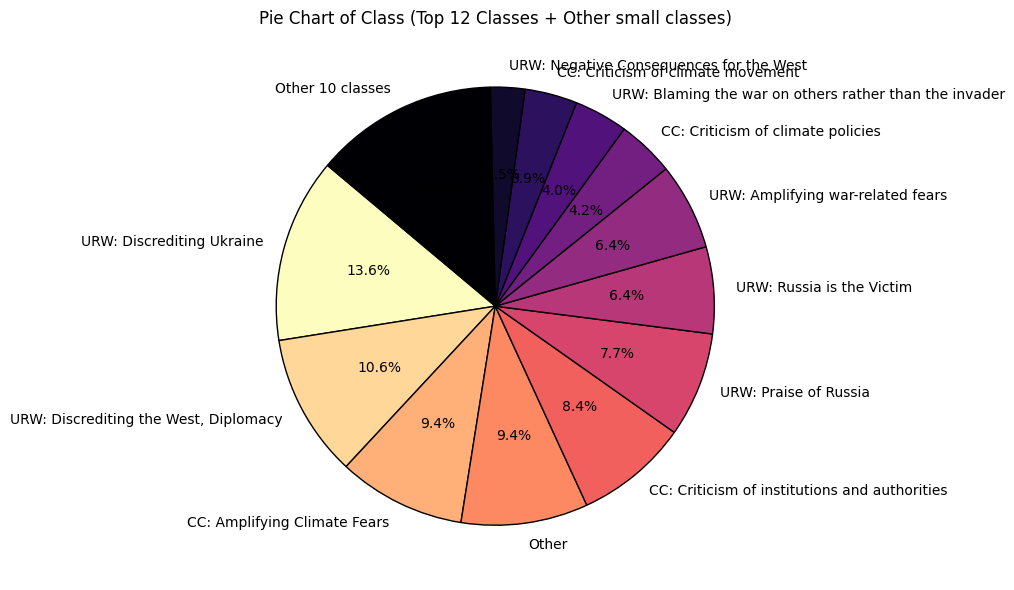

In [36]:
calculate_plot(combined_df, 'text', 'narrative_labels')

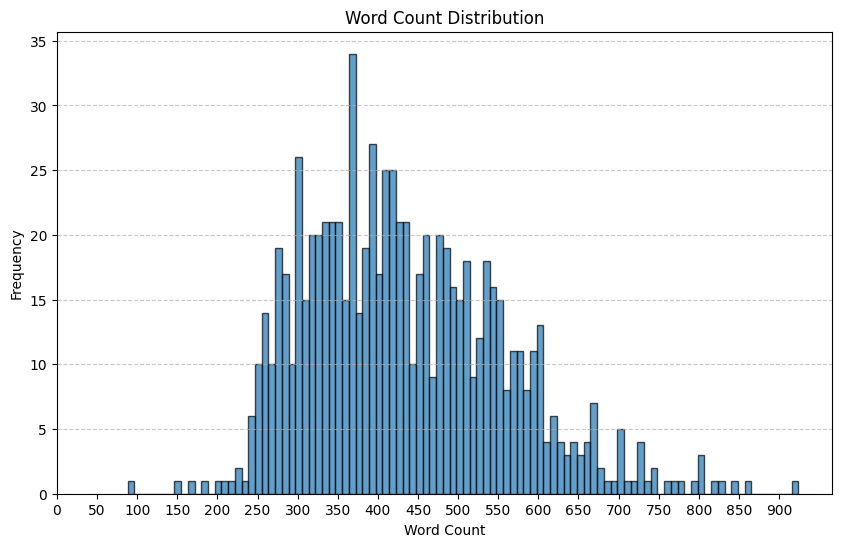

Label Frequencies:
 sub_narrative_labels
Other                                                                                      196
URW: Discrediting the West, Diplomacy: Other                                               114
CC: Amplifying Climate Fears: Other                                                         90
URW: Discrediting Ukraine: Discrediting Ukrainian government and officials and policies     73
CC: Criticism of institutions and authorities: Criticism of national governments            69
                                                                                          ... 
URW: Discrediting Ukraine: Rewriting Ukraine’s history                                       1
CC: Climate change is beneficial: Other                                                      1
URW: Discrediting Ukraine: Discrediting Ukrainian nation and society                         1
URW: Blaming the war on others rather than the invader: Other                                1
URW: Over

C:\Users\yelzha\AppData\Local\Temp\ipykernel_21348\2529593001.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.values, y=label_counts.index, palette='viridis')


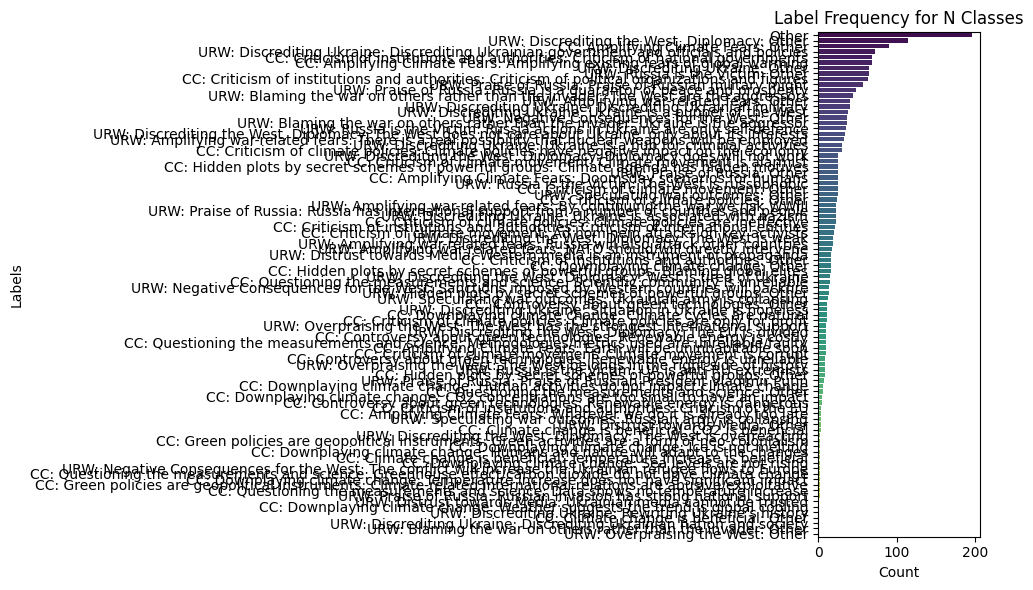

C:\Users\yelzha\AppData\Local\Temp\ipykernel_21348\2529593001.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_labels.values, y=top_labels.index, palette='rocket')


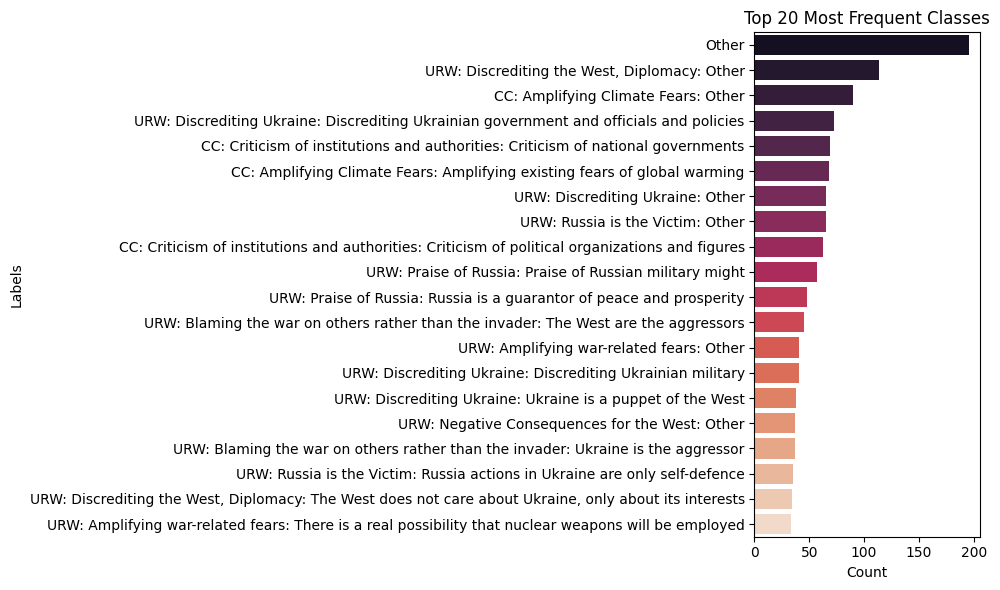

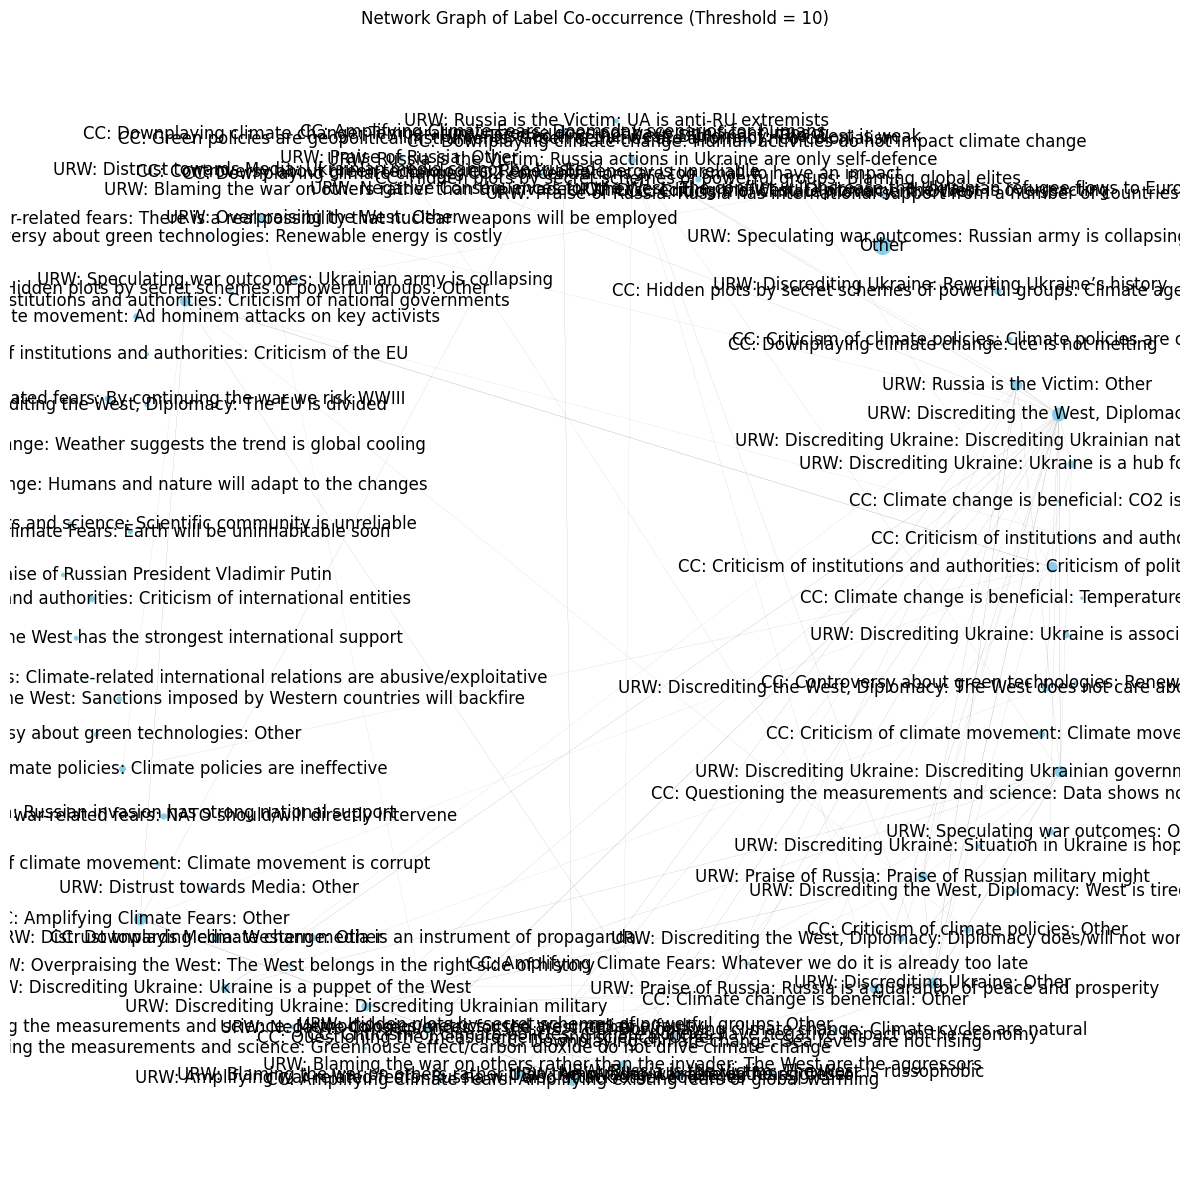

C:\Users\yelzha\AppData\Local\Temp\ipykernel_21348\2529593001.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Label Combination', data=combo_df, palette="mako")
C:\Users\yelzha\AppData\Local\Temp\ipykernel_21348\2529593001.py:135: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


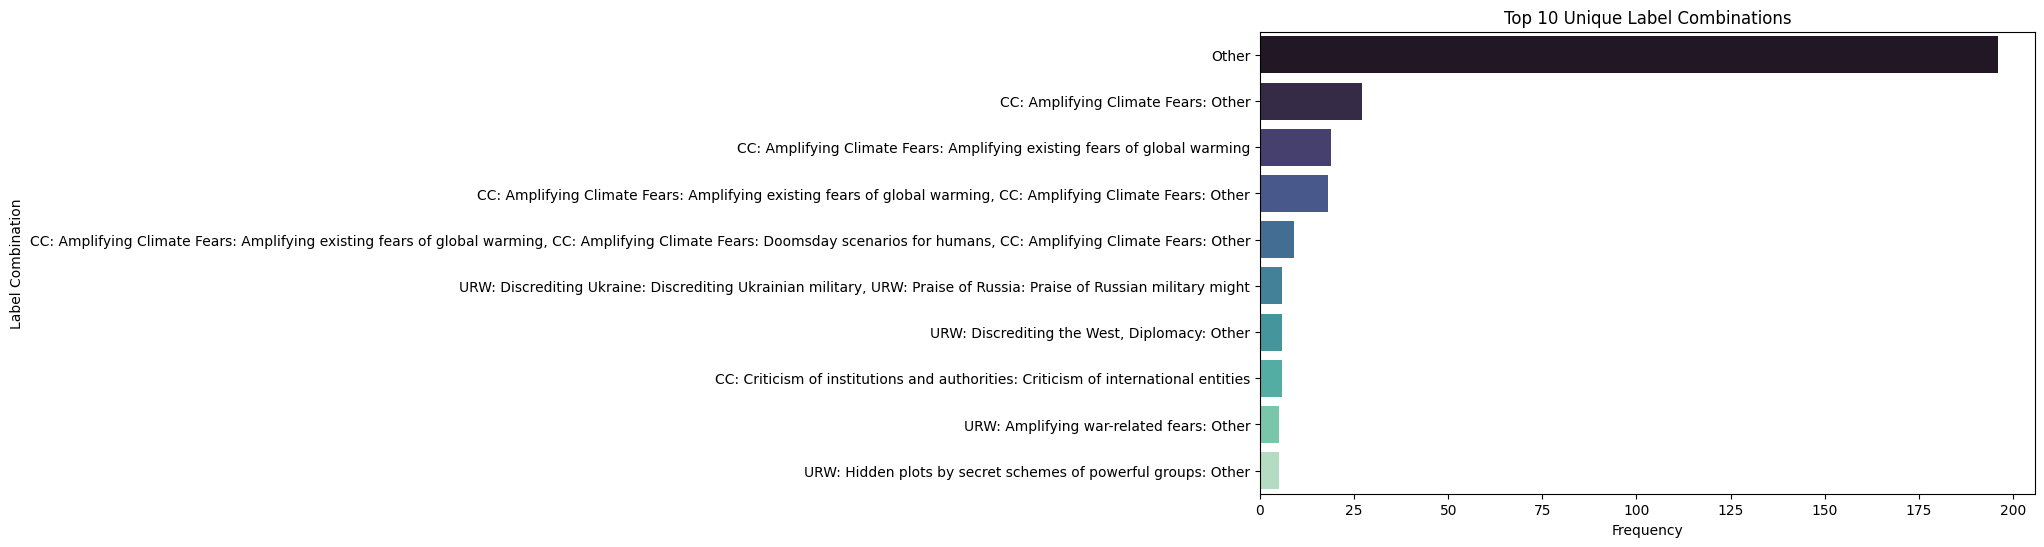

AttributeError: 'list' object has no attribute 'expandtabs'

In [37]:
calculate_plot(combined_df, 'text', 'sub_narrative_labels')

In [10]:
combined_df['dataset_type'] = combined_df['narrative'].apply(lambda x: 'CC' if 'CC' in x else 'URW' if 'URW' in x else 'Other')
combined_df.groupby('dataset_type').agg({'count_narrative_labels': 'mean', 'count_sub_narrative_labels': 'mean'})

KeyError: "Column(s) ['count_narrative_labels', 'count_sub_narrative_labels'] do not exist"

filename                                               text  \
0    EN_CC_100013.txt  Bill Gates Says He Is ‘The Solution’ To Climat...   
1    EN_UA_300009.txt  Russia: Clashes erupt in Bashkortostan as righ...   
2    EN_UA_300017.txt  McDonald's to exit Russia, sell business in co...   
3    EN_CC_100021.txt  Collaborative plans, innovation keys to circul...   
4    EN_UA_300041.txt  Russia intends to supply light ‘Mountain’ tank...   
..                ...                                                ...   
794        PT_272.txt  Exército da Rússia anuncia conquista da cidade...   
795        PT_323.txt  Cabo Verde vai ter novo laboratório de Observa...   
796         PT_74.txt  Rússia assume controlo de mais uma povoação no...   
797         PT_31.txt  Quais foram as consequências do ataque de Iska...   
798        PT_238.txt  Ortega celebra com música e dança o 45.º anive...   

    language  
0         EN  
1         EN  
2         EN  
3         EN  
4         EN  
..       ...  
794       PT  
795       PT  
796       PT  
797       PT  
798       PT  

[799 rows x 3 columns]

In [22]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load your dataframe
# Example: df = pd.read_csv("your_file.csv")
# Ensure it has a "text" column
text_column = 'text'
df = combined_df[['filename', 'text', 'language']]

# Load BERT tokenizer and model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Get embeddings for the text
def get_text_embeddings(texts):
    embeddings = []
    for text in texts:
        # Tokenize and get model outputs
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        # Get CLS token representation (embedding)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze(0)
        embeddings.append(cls_embedding.numpy())
    return embeddings

# Extract embeddings
texts = df[text_column].tolist()
embeddings = get_text_embeddings(texts)

C:\Users\yelzha\AppData\Local\Temp\ipykernel_21164\3063764425.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dataset'] = combined_df['narrative'].apply(lambda x: 'CC' if 'CC' in x else 'URW' if 'URW' else 'Other')
C:\Users\yelzha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


AttributeError: 'list' object has no attribute 'shape'

In [26]:
import numpy as np

embeddings_np = np.array(embeddings)

C:\Users\yelzha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\yelzha\AppData\Local\Temp\ipykernel_21164\98409450.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dataset'] = combined_df['narrative'].apply(lambda x: 'CC' if 'CC' in x else 'URW' if 'URW' in x else 'Other')
C:\Users\yelzha\AppData\Local\Temp\ipykernel_21164\98409450.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

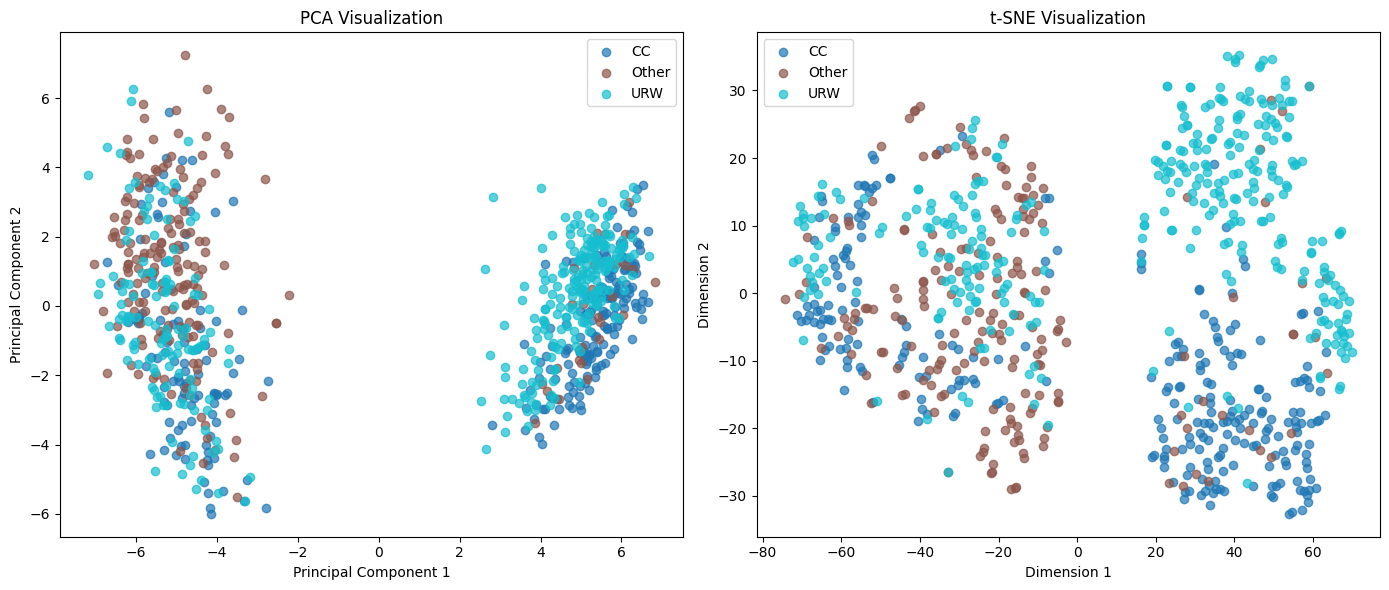

In [53]:
from matplotlib import cm

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings_np)

# Dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=10, n_iter=1000)
tsne_result = tsne.fit_transform(embeddings_np)

# Get labels for coloring
df['dataset'] = combined_df['narrative'].apply(lambda x: 'CC' if 'CC' in x else 'URW' if 'URW' in x else 'Other')
label_column = 'labels'
df['labels'] = (df['dataset']).tolist() # (df['language']+'_'+df['dataset']).tolist()
labels = df['labels']
unique_labels = sorted(list(set(labels)))

cmap = cm.get_cmap("tab10", len(unique_labels))  # Use tab10 colormap with unique colors
label_to_color = {label: cmap(idx) for idx, label in enumerate(unique_labels)}

colors = [label_to_color[label] for label in labels]  # Map labels to colors


# Plotting PCA with labels
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for label, color in label_colors.items():
    indices = df[label_column] == label
    plt.scatter(
        pca_result[indices, 0],
        pca_result[indices, 1],
        label=label,
        color=color,
        alpha=0.7
    )
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

# Plotting t-SNE with labels
plt.subplot(1, 2, 2)
for label, color in label_colors.items():
    indices = df[label_column] == label
    plt.scatter(
        tsne_result[indices, 0],
        tsne_result[indices, 1],
        label=label,
        color=color,
        alpha=0.7
    )
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()

plt.tight_layout()
plt.show()

In [62]:
combined_df['narrative'].str.split(';', expand=True)

0  \
0                                                Other   
1                                                Other   
2                        URW: Speculating war outcomes   
3                                                Other   
4                                                Other   
..                                                 ...   
195                          URW: Russia is the Victim   
196                                              Other   
197                  URW: Amplifying war-related fears   
198  URW: Blaming the war on others rather than the...   
199                                              Other   

                                                     1  \
0                                                 None   
1                                                 None   
2                            URW: Discrediting Ukraine   
3                                                 None   
4                                                 None   
..                                                 ...   
195  URW: Blaming the war on others rather than the...   
196                                               None   
197                  URW: Amplifying war-related fears   
198  URW: Blaming the war on others rather than the...   
199                                               None   

                                                     2  \
0                                                 None   
1                                                 None   
2                URW: Discrediting the West, Diplomacy   
3                                                 None   
4                                                 None   
..                                                 ...   
195  URW: Hidden plots by secret schemes of powerfu...   
196                                               None   
197                  URW: Amplifying war-related fears   
198                          URW: Russia is the Victim   
199                                               None   

                             3                                      4     5  \
0                         None                                   None  None   
1                         None                                   None  None   
2        URW: Praise of Russia  URW: Discrediting the West, Diplomacy  None   
3                         None                                   None  None   
4                         None                                   None  None   
..                         ...                                    ...   ...   
195  URW: Discrediting Ukraine                                   None  None   
196                       None                                   None  None   
197                       None                                   None  None   
198  URW: Russia is the Victim                                   None  None   
199                       None                                   None  None   

        6     7  
0    None  None  
1    None  None  
2    None  None  
3    None  None  
4    None  None  
..    ...   ...  
195  None  None  
196  None  None  
197  None  None  
198  None  None  
199  None  None  

[200 rows x 8 columns]

In [65]:
from collections import Counter

Counter(';'.join(combined_df['narrative'].values).split(';'))

Counter({'Other': 97,
         'URW: Discrediting the West, Diplomacy': 50,
         'URW: Amplifying war-related fears': 43,
         'URW: Discrediting Ukraine': 29,
         'CC: Criticism of institutions and authorities': 24,
         'URW: Blaming the war on others rather than the invader': 21,
         'CC: Criticism of climate movement': 18,
         'URW: Speculating war outcomes': 17,
         'URW: Russia is the Victim': 17,
         'CC: Criticism of climate policies': 16,
         'URW: Praise of Russia': 12,
         'URW: Overpraising the West': 10,
         'URW: Distrust towards Media': 10,
         'CC: Controversy about green technologies': 9,
         'URW: Hidden plots by secret schemes of powerful groups': 8,
         'CC: Hidden plots by secret schemes of powerful groups': 8,
         'CC: Questioning the measurements and science': 8,
         'URW: Negative Consequences for the West': 7,
         'CC: Downplaying climate change': 3,
         'CC: Climate change i

In [68]:
len(
    {i for i in set(';'.join(combined_df['narrative'].values).split(';')) if 'URW' in i}
)

11

In [93]:
?pd.Series.sort_values

In [94]:
combined_df['narrative']

0                                                  Other
1                                                  Other
2      URW: Speculating war outcomes;URW: Discreditin...
3                                                  Other
4                                                  Other
                             ...                        
195    URW: Russia is the Victim;URW: Blaming the war...
196                                                Other
197    URW: Amplifying war-related fears;URW: Amplify...
198    URW: Blaming the war on others rather than the...
199                                                Other
Name: narrative, Length: 200, dtype: object

In [96]:
combined_df['narrative'].sort_values(ascending=False, key=lambda x: x.str.len()).values[:5]

array(['URW: Discrediting the West, Diplomacy;URW: Discrediting the West, Diplomacy;URW: Blaming the war on others rather than the invader;URW: Hidden plots by secret schemes of powerful groups;URW: Amplifying war-related fears;URW: Amplifying war-related fears;URW: Discrediting Ukraine;URW: Praise of Russia',
       'URW: Russia is the Victim;URW: Discrediting Ukraine;URW: Discrediting Ukraine;URW: Blaming the war on others rather than the invader;URW: Discrediting the West, Diplomacy;URW: Blaming the war on others rather than the invader;URW: Discrediting Ukraine;URW: Discrediting the West, Diplomacy',
       'CC: Criticism of institutions and authorities;CC: Criticism of climate policies;CC: Criticism of climate movement;CC: Criticism of climate movement;CC: Hidden plots by secret schemes of powerful groups;CC: Controversy about green technologies;CC: Criticism of climate policies',
       'CC: Criticism of institutions and authorities;CC: Criticism of climate movement;CC: Criticism

In [66]:
from collections import Counter

Counter(';'.join(combined_df['sub_narrative'].values).split(';'))

Counter({'Other': 97,
         'URW: Blaming the war on others rather than the invader: The West are the aggressors': 18,
         'URW: Amplifying war-related fears: There is a real possibility that nuclear weapons will be employed': 16,
         'URW: Discrediting the West, Diplomacy: Other': 15,
         'CC: Criticism of institutions and authorities: Criticism of national governments': 12,
         'URW: Amplifying war-related fears: Russia will also attack other countries': 11,
         'URW: Distrust towards Media: Western media is an instrument of propaganda': 9,
         'URW: Discrediting the West, Diplomacy: The West does not care about Ukraine, only about its interests': 8,
         'URW: Hidden plots by secret schemes of powerful groups: Other': 8,
         'CC: Criticism of climate movement: Ad hominem attacks on key activists': 8,
         'URW: Discrediting Ukraine: Ukraine is a puppet of the West': 8,
         'URW: Speculating war outcomes: Other': 7,
         'URW: Di

In [70]:
len(
    {i for i in set(';'.join(combined_df['sub_narrative'].values).split(';')) if 'CC' in i}
)

29

In [60]:
set(';'.join(combined_df['sub_narrative'].values).split(';'))

{'CC: Climate change is beneficial: CO2 is beneficial',
 'CC: Controversy about green technologies: Other',
 'CC: Controversy about green technologies: Renewable energy is costly',
 'CC: Controversy about green technologies: Renewable energy is dangerous',
 'CC: Controversy about green technologies: Renewable energy is unreliable',
 'CC: Criticism of climate movement: Ad hominem attacks on key activists',
 'CC: Criticism of climate movement: Climate movement is alarmist',
 'CC: Criticism of climate movement: Climate movement is corrupt',
 'CC: Criticism of climate movement: Other',
 'CC: Criticism of climate policies: Climate policies are ineffective',
 'CC: Criticism of climate policies: Climate policies are only for profit',
 'CC: Criticism of climate policies: Climate policies have negative impact on the economy',
 'CC: Criticism of climate policies: Other',
 'CC: Criticism of institutions and authorities: Criticism of international entities',
 'CC: Criticism of institutions and aut

In [59]:
len(set(';'.join(combined_df['sub_narrative'].values).split(';')))

71

In [56]:
len(set(';'.join(combined_df['narrative'].values).split(';')))

21

# Other parts

In [10]:
def min_max(documents):
    docs = ["".join(doc) for doc in documents]
    char_length = [len(document) for document in docs]
    word_length = [len(document.split()) for document in docs]
    token_length =[len(nlp(document)) for document in docs]
    
    max_char_length = max(char_length)
    min_char_length = min(char_length)
    
    max_word_length = max(word_length)
    min_word_length = min(word_length)
    
    max_token_length = max(token_length)
    min_token_length = min(token_length)
    
    return {
        "max_char_length": max_char_length,
        "min_char_length": min_char_length,
        "max_word_length": max_word_length,
        "min_word_length": min_word_length,
        "max_token_length": max_token_length,
        "min_token_length": min_token_length
        
    }
analysis_all = min_max(gen_documents_all())

print(f" total Max Char Length: {analysis_all['max_char_length']}")
print(f" total Min Char Length: {analysis_all['min_char_length']}")
print(f" total Max Word Length: {analysis_all['max_word_length']}")
print(f" total Min Word Length: {analysis_all['min_word_length']}")
print(f" total Max Token Length: {analysis_all['max_token_length']}")
print(f" total Min Token Length: {analysis_all['min_token_length']}")


 total Max Char Length: 5199
 total Min Char Length: 543
 total Max Word Length: 863
 total Min Word Length: 88
 total Max Token Length: 1001
 total Min Token Length: 102


In [11]:

def gen_documents_cc():
    directory_path = 'training_data/EN/raw-documents'
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path):
            with open(file_path, "r", encoding="utf-8") as file:
                if "CC" in file_path:
                    yield file.read()


def gen_documents_ua():
    directory_path = 'training_data/EN/raw-documents'
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path):
            with open(file_path, "r", encoding="utf-8") as file:
                if "UA" in file_path:
                    yield file.read()

texts = gen_documents_all()
texts = ["".join(text) for text in texts]
len_texts = len(texts)
print(f"overall amount of texts {len_texts}")
texts_cc = gen_documents_cc()
texts_cc = ["".join(text) for text in texts_cc]
len_texts_cc = len(texts_cc)
print(f"overall amount of texts on CC {len_texts_cc}")
texts_ua = gen_documents_ua()
texts_ua = ["".join(text) for text in texts_ua]
len_texts_ua = len(texts_ua)
print(f"overall amount of texts on UA {len_texts_ua}")


overall amount of texts 200
overall amount of texts on CC 72
overall amount of texts on UA 128


In [12]:
analysis_cc = min_max(gen_documents_cc())

print(f"  Max Char Length of CC texts: {analysis_cc['max_char_length']}")
print(f"  Min Char Length of CC texts: {analysis_cc['min_char_length']}")
print(f"  Max Word Length of CC texts: {analysis_cc['max_word_length']}")
print(f"  Min Word Length of CC texts: {analysis_cc['min_word_length']}")
print(f"  Max Token Length of CC texts: {analysis_cc['max_token_length']}")
print(f"  Min Token Length of CC texts: {analysis_cc['min_token_length']}")

  Max Char Length of CC texts: 4980
  Min Char Length of CC texts: 543
  Max Word Length of CC texts: 844
  Min Word Length of CC texts: 88
  Max Token Length of CC texts: 963
  Min Token Length of CC texts: 102


In [13]:
analysis_ua = min_max(gen_documents_ua())

print(f"  Max Char Length of UA texts: {analysis_ua['max_char_length']}")
print(f"  Min Char Length of UA texts: {analysis_ua['min_char_length']}")
print(f"  Max Word Length of UA texts: {analysis_ua['max_word_length']}")
print(f"  Min Word Length of UA texts: {analysis_ua['min_word_length']}")
print(f"  Max Token Length of UA texts: {analysis_ua['max_token_length']}")
print(f"  Min Token Length of UA texts: {analysis_ua['min_token_length']}")

  Max Char Length of UA texts: 5199
  Min Char Length of UA texts: 1740
  Max Word Length of UA texts: 863
  Min Word Length of UA texts: 283
  Max Token Length of UA texts: 1001
  Min Token Length of UA texts: 328


In [14]:
analysis_cc_all = analyze_documents(gen_documents_cc())

print("Combined Analysis for CC Documents:")
print(f"  Word Count: {analysis_cc_all ['word_count']}")
print(f"  Sentence Count: {analysis_cc_all ['sentence_count']}")
print(f"  Avg. Sentence Length: {analysis_cc_all ['avg_sentence_length']:.2f}")
print(f"  Vocabulary Size: {analysis_cc_all ['vocabulary_size']}")

Combined Analysis for CC Documents:
  Word Count: 33414
  Sentence Count: 1465
  Avg. Sentence Length: 22.81
  Vocabulary Size: 6087


In [15]:
analysis_ua_all = analyze_documents(gen_documents_ua())

print("Combined Analysis for UA Documents:")
print(f"  Word Count: {analysis_ua_all ['word_count']}")
print(f"  Sentence Count: {analysis_ua_all ['sentence_count']}")
print(f"  Avg. Sentence Length: {analysis_ua_all ['avg_sentence_length']:.2f}")
print(f"  Vocabulary Size: {analysis_ua_all ['vocabulary_size']}")

Combined Analysis for UA Documents:
  Word Count: 65746
  Sentence Count: 2822
  Avg. Sentence Length: 23.30
  Vocabulary Size: 7864


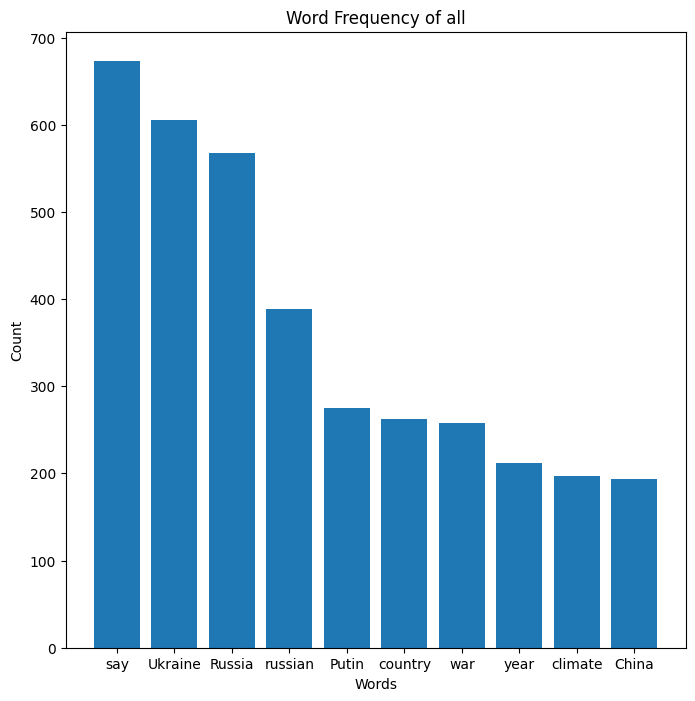

In [16]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

def cleanse_plot_top_words(texts, str):
    nlp = spacy.load('en_core_web_sm')
    
    lemmatized_words = []
    for text in texts:
        doc = nlp(text)
        for token in doc:
            if not token.is_stop and not token.is_punct and not token.is_space:
                lemmatized_words.append(token.lemma_)
    word_freq = Counter(lemmatized_words)
    most_common = word_freq.most_common(10)
    words, counts = zip(*most_common)
    
    plt.figure(figsize=(8, 8))
    plt.bar(words, counts)
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.title(f"Word Frequency of {str}")
    plt.show()
    
cleanse_plot_top_words(return_texts(gen_documents_all()), "all")

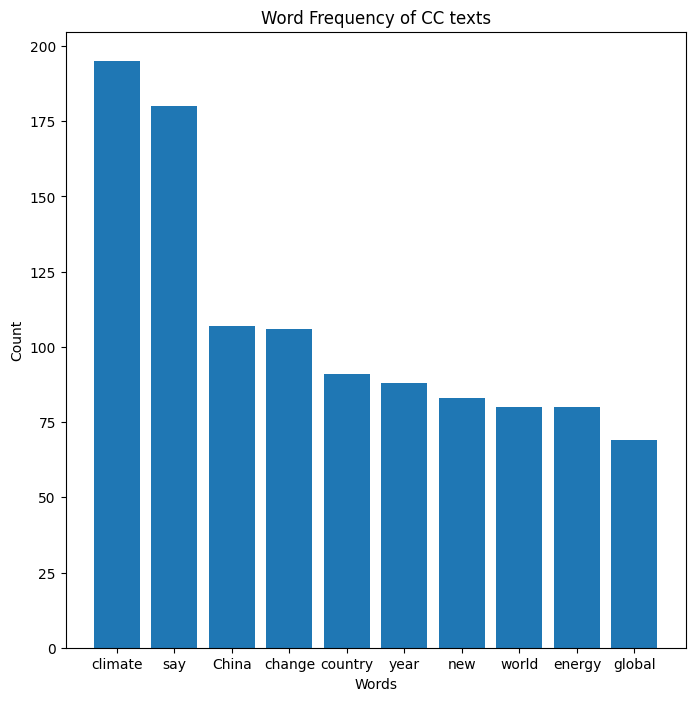

In [17]:
cleanse_plot_top_words(return_texts(gen_documents_cc()), "CC texts")

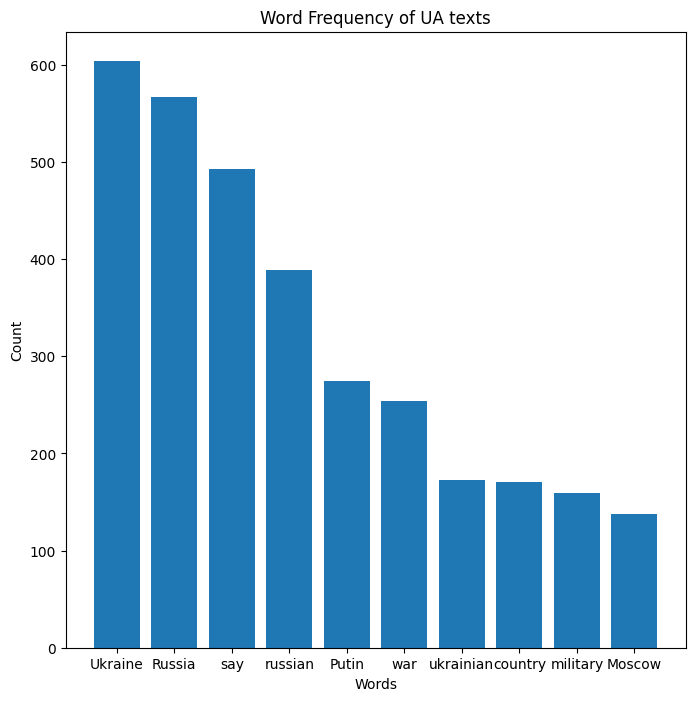

In [18]:
cleanse_plot_top_words(return_texts(gen_documents_ua()), "UA texts")

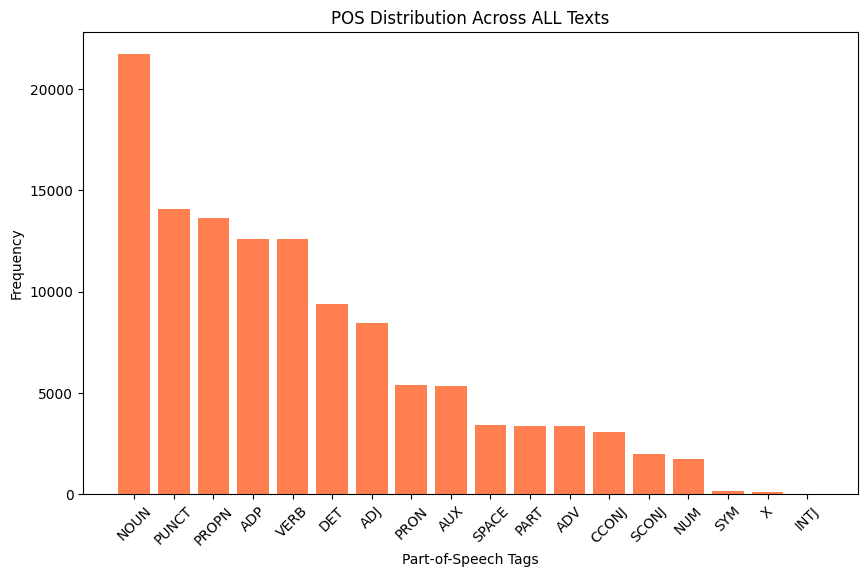

In [19]:
def process_and_plot_pos_distribution(texts,str):

    nlp = spacy.load("en_core_web_sm")
    
    pos_tags = []
    
    for text in texts:
        doc = nlp(text)  # Process the text
        for token in doc:
            # Add the POS tag to the list
            pos_tags.append(token.pos_)
    
    pos_freq = Counter(pos_tags)
    
    sorted_pos = pos_freq.most_common()
    
    tags, counts = zip(*sorted_pos)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(tags, counts, color='coral')
    plt.xlabel("Part-of-Speech Tags")
    plt.ylabel("Frequency")
    plt.title(f"POS Distribution Across {str} Texts")
    plt.xticks(rotation=45)
    plt.show()

    
process_and_plot_pos_distribution(return_texts(gen_documents_all()), "ALL")

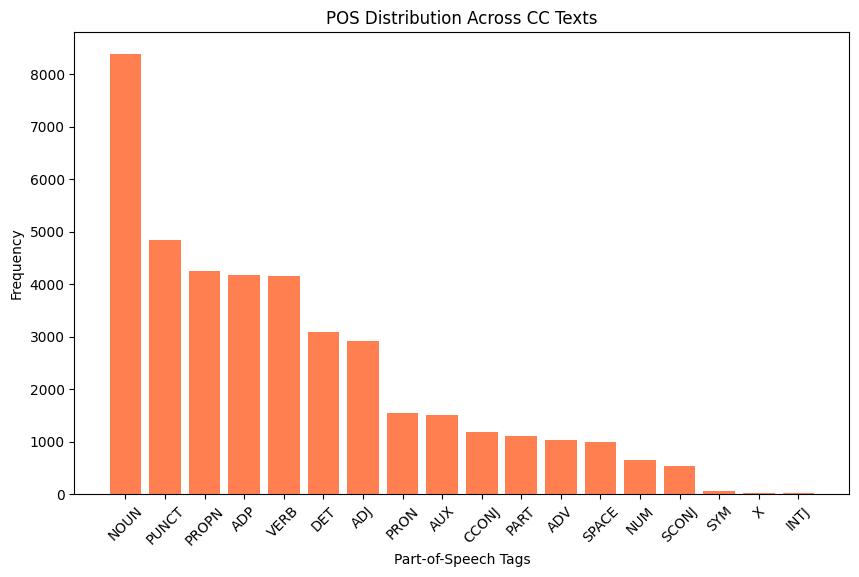

In [20]:
process_and_plot_pos_distribution(return_texts(gen_documents_cc()), "CC")

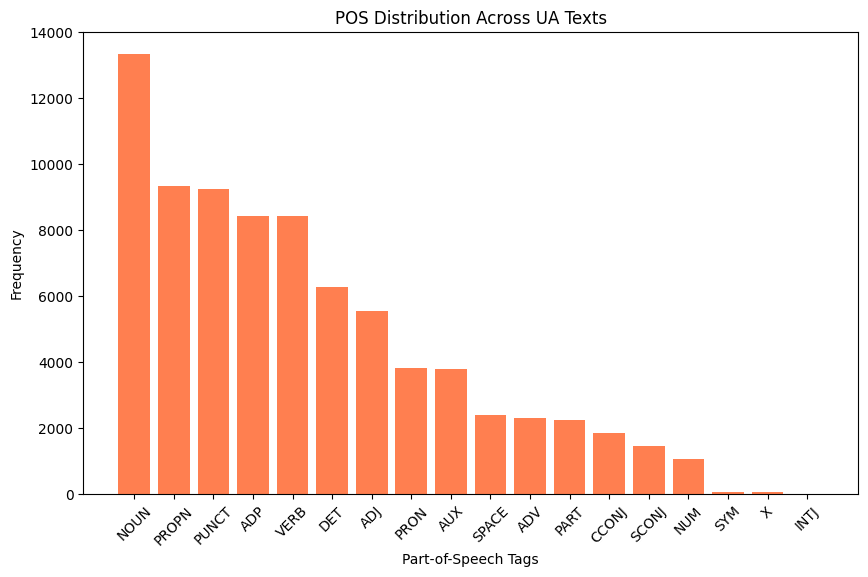

In [21]:
process_and_plot_pos_distribution(return_texts(gen_documents_ua()), "UA")

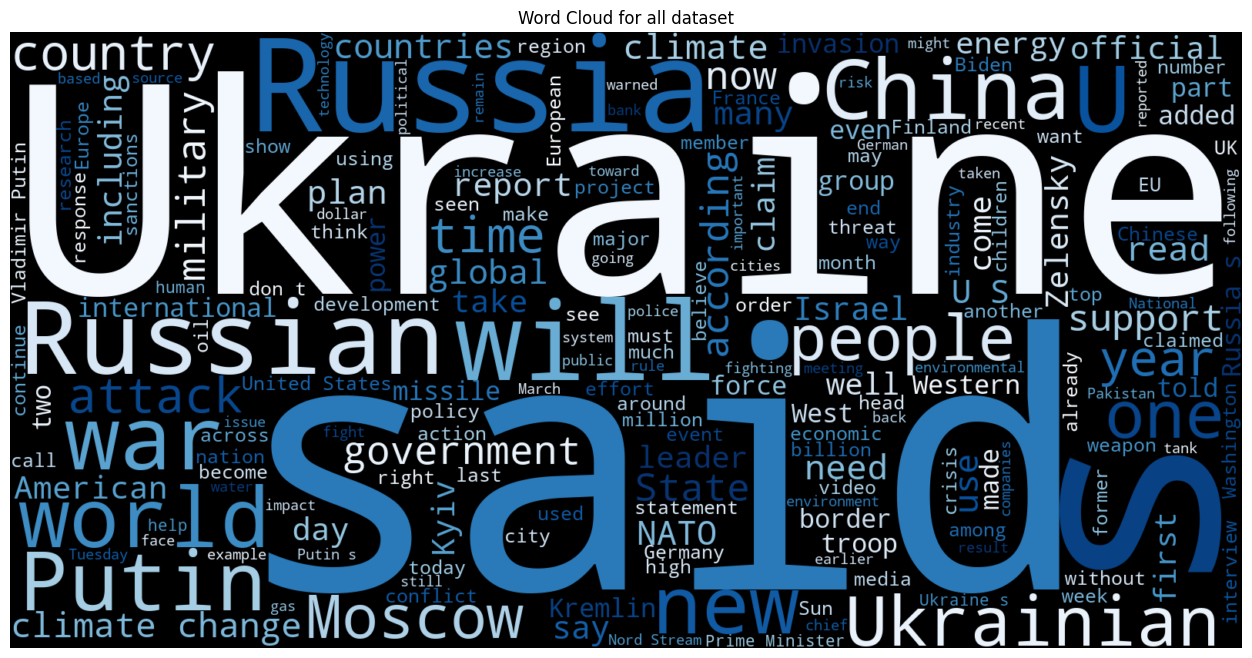

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_docs = return_texts(gen_documents_all())

wordcloud_positive = WordCloud(width=1600, height=800, colormap='Blues').generate(' '.join(all_docs))

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title(f'Word Cloud for all dataset')
plt.axis('off')
plt.show()

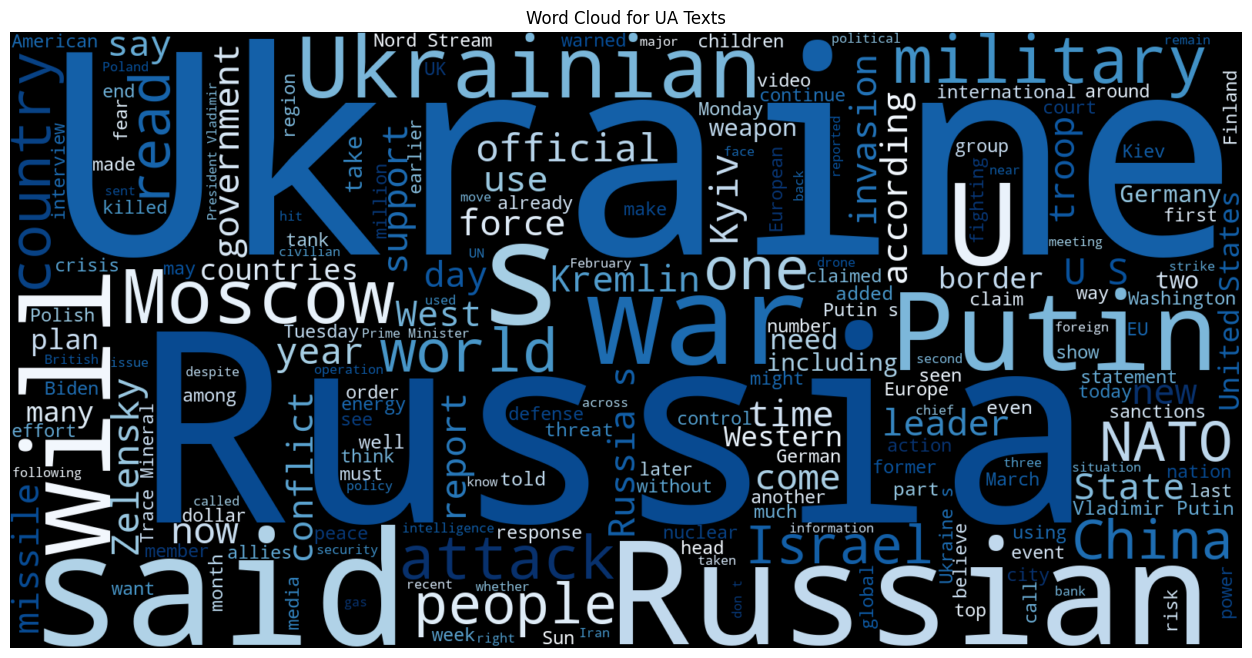

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_docs_ua = return_texts(gen_documents_ua())

wordcloud_positive = WordCloud(width=1600, height=800, colormap='Blues').generate(' '.join(all_docs_ua))

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title(f'Word Cloud for UA Texts')
plt.axis('off')
plt.show()

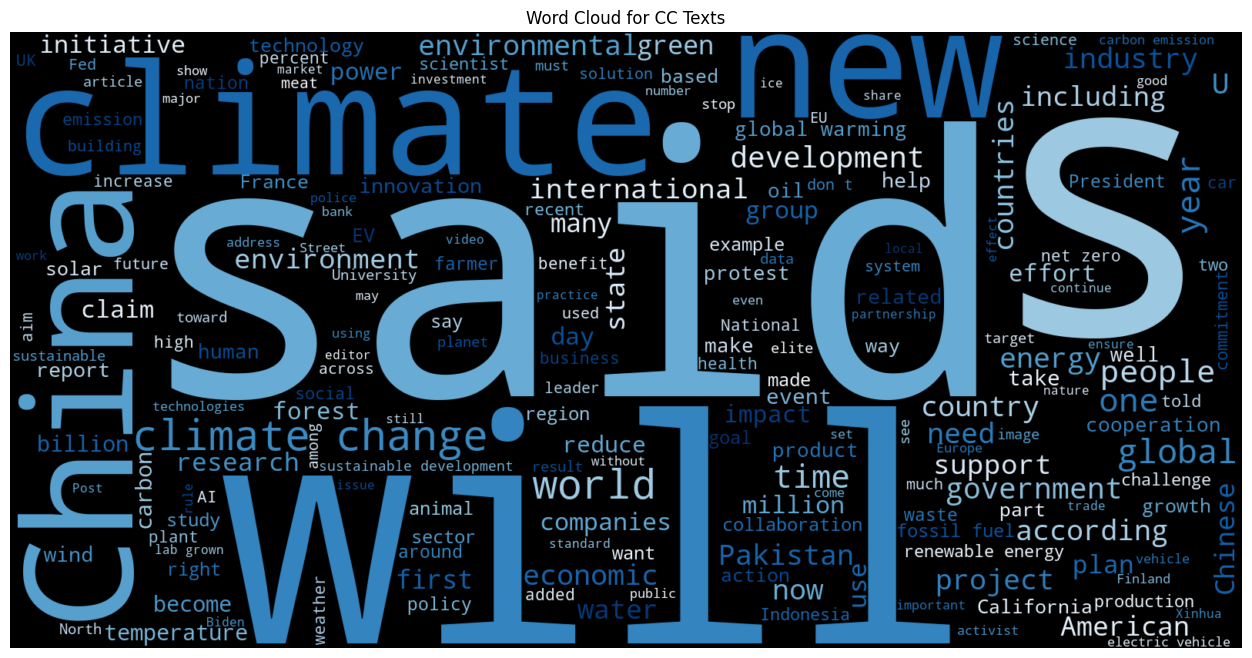

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_docs_cc = return_texts(gen_documents_cc())

wordcloud_positive = WordCloud(width=1600, height=800, colormap='Blues').generate(' '.join(all_docs_cc))

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title(f'Word Cloud for CC Texts')
plt.axis('off')
plt.show()